In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
from model_GMM import init_specific_model
from losses_GMM import BetaLoss, BtcvaeLoss
from dset_GMM import get_dataloaders
from training import Trainer
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


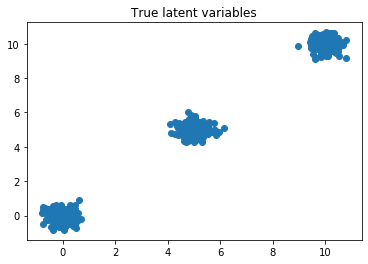

In [28]:
# GET DATALOADERS
train_loader, train_latents = get_dataloaders(n_samples_per_cluster=5000, 
                                              batch_size=100, 
                                              shuffle=True,
                                              return_latents=True)
test_loader, test_latents = get_dataloaders(n_samples_per_cluster=200, 
                                            batch_size=100, 
                                            shuffle=False,
                                            return_latents=True)

# PLOT LATENT VARIABLES
plot_2d_samples(test_latents)
plt.title('True latent variables')
plt.show()

In [29]:
# PREPARES MODEL
model = init_specific_model(orig_dim=10, latent_dim=2)
model = model.to(device)

# TRAINS
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
beta = 0
loss_f = BetaLoss(beta=beta)

attr_lamb = 30.0
trainer = Trainer(model, optimizer, loss_f, device=device, attr_lamb=attr_lamb)
trainer(train_loader, test_loader, epochs=60)

# SAVE MODEL
save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

name = "beta" + str(beta) + "_attr" + str(attr_lamb)
torch.save(model.state_dict(), opj(save_dir, name)) 

====> Epoch: 0 Average train loss: 81.0582 (Test set loss: 74.4937)
====> Epoch: 1 Average train loss: 40.5104 (Test set loss: 7.6183)
====> Epoch: 2 Average train loss: 7.0701 (Test set loss: 4.3259)
====> Epoch: 3 Average train loss: 4.3387 (Test set loss: 3.3432)
====> Epoch: 4 Average train loss: 2.8005 (Test set loss: 2.0155)
====> Epoch: 5 Average train loss: 1.7940 (Test set loss: 1.5233)
====> Epoch: 6 Average train loss: 1.4522 (Test set loss: 1.3421)
====> Epoch: 7 Average train loss: 1.3117 (Test set loss: 1.2213)
====> Epoch: 8 Average train loss: 1.2022 (Test set loss: 1.1644)
====> Epoch: 9 Average train loss: 1.1536 (Test set loss: 1.1287)
====> Epoch: 10 Average train loss: 1.1173 (Test set loss: 1.0999)
====> Epoch: 11 Average train loss: 1.0892 (Test set loss: 1.0862)
====> Epoch: 12 Average train loss: 1.0699 (Test set loss: 1.0682)
====> Epoch: 13 Average train loss: 1.0539 (Test set loss: 1.0600)
====> Epoch: 14 Average train loss: 1.0425 (Test set loss: 1.0536)
==

In [30]:
trainer(train_loader, test_loader, epochs=60)

====> Epoch: 0 Average train loss: 0.8995 (Test set loss: 0.9484)
====> Epoch: 1 Average train loss: 0.8906 (Test set loss: 0.9379)
====> Epoch: 2 Average train loss: 0.8857 (Test set loss: 0.9260)
====> Epoch: 3 Average train loss: 0.8804 (Test set loss: 0.9169)
====> Epoch: 4 Average train loss: 0.8777 (Test set loss: 0.9031)
====> Epoch: 5 Average train loss: 0.8722 (Test set loss: 0.8963)
====> Epoch: 6 Average train loss: 0.8684 (Test set loss: 0.8847)
====> Epoch: 7 Average train loss: 0.8629 (Test set loss: 0.8800)
====> Epoch: 8 Average train loss: 0.8581 (Test set loss: 0.8754)
====> Epoch: 9 Average train loss: 0.8538 (Test set loss: 0.8692)
====> Epoch: 10 Average train loss: 0.8494 (Test set loss: 0.8634)
====> Epoch: 11 Average train loss: 0.8435 (Test set loss: 0.8646)
====> Epoch: 12 Average train loss: 0.8409 (Test set loss: 0.8581)
====> Epoch: 13 Average train loss: 0.8372 (Test set loss: 0.8510)
====> Epoch: 14 Average train loss: 0.8320 (Test set loss: 0.8642)
====>

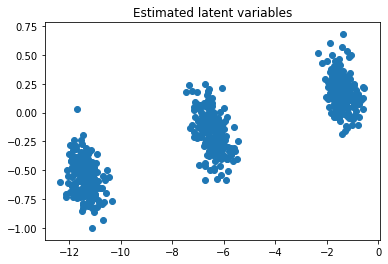

In [31]:
# EVALUATE TEST DATA
data = test_loader.dataset.data.to(device)
recon_data, latent_dist, latent_sample = model(data)

plot_2d_samples(latent_sample.detach().cpu())
plt.title('Estimated latent variables')
plt.show()

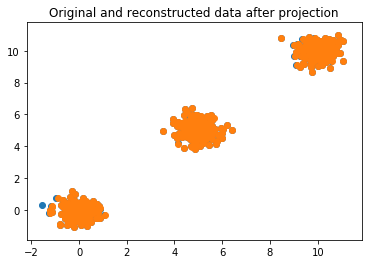

In [32]:
plot_2d_samples(data.detach().cpu()[:,:2])
plot_2d_samples(recon_data.detach().cpu()[:,:2])
plt.title('Original and reconstructed data after projection')
plt.show()

In [33]:
print('Pen: {:.8f}'.format(trainer._comp_latent_pen(latent_sample, data).item()))

Pen: 0.00007199


###  PLOT TRAVERSALS

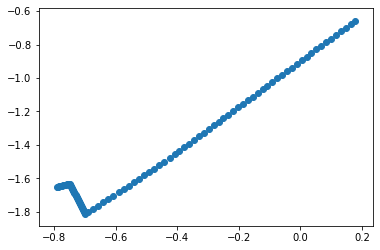

In [34]:
# GET TRAVERSAL
decoded_traversal = traversals(model, data=None)

# PROJECTION to FIRST TWO COORDINATES
decoded_traversal0 = decoded_traversal[:,:2]
plot_2d_samples(decoded_traversal0[:100])

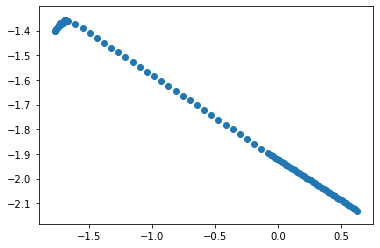

In [35]:
plot_2d_samples(decoded_traversal0[100:])

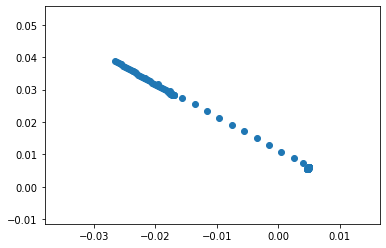

In [36]:
# PROJECTION to SECOND TWO COORDINATES
decoded_traversal1 = decoded_traversal[:,2:4]
plot_2d_samples(decoded_traversal1[:100])

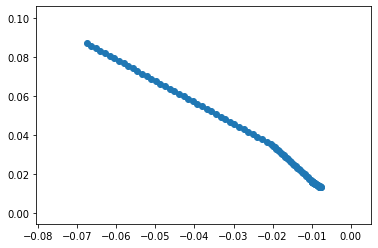

In [37]:
plot_2d_samples(decoded_traversal1[100:])

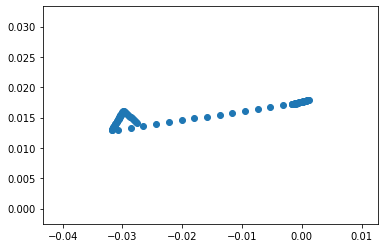

In [38]:
# PROJECTION to THIRD TWO COORDINATES
decoded_traversal2 = decoded_traversal[:,4:6]
plot_2d_samples(decoded_traversal2[:100])

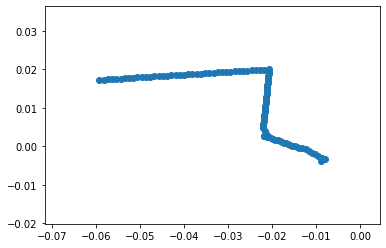

In [39]:
plot_2d_samples(decoded_traversal2[100:])

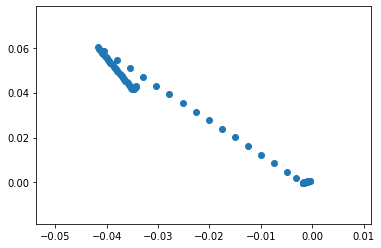

In [40]:
# PROJECTION to FOURTH TWO COORDINATES
decoded_traversal3 = decoded_traversal[:,6:8]
plot_2d_samples(decoded_traversal3[:100])

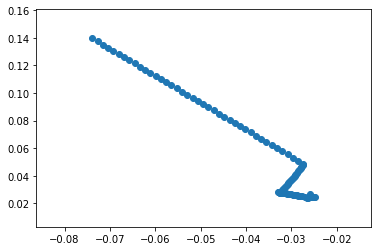

In [41]:
plot_2d_samples(decoded_traversal3[100:])

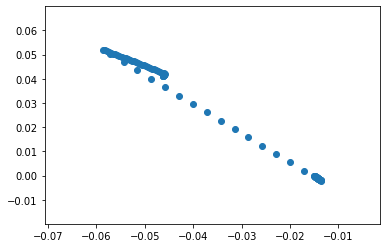

In [42]:
# PROJECTION to FIFTH TWO COORDINATES
decoded_traversal4 = decoded_traversal[:,8:10]
plot_2d_samples(decoded_traversal4[:100])

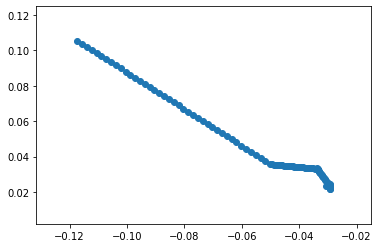

In [43]:
plot_2d_samples(decoded_traversal4[100:])